In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [27]:
df['Class']

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

In [28]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

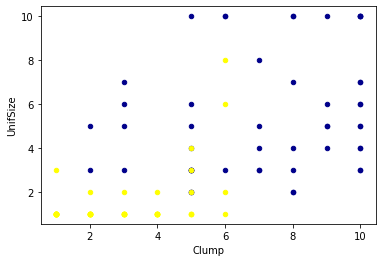

In [29]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x = 'Clump',y = 'UnifSize', c = 'DarkBlue');
df[df['Class'] == 2][0:50].plot(kind='scatter', x = 'Clump',y = 'UnifSize', c = 'Yellow',ax = ax);
plt.show()

In [30]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [31]:
df['BareNuc'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [32]:
df = df [ pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc']= df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [33]:
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [34]:
df.duplicated().sum()

8

In [35]:
df.shape

(683, 11)

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.shape

(675, 11)

In [38]:
featuer_df = df.iloc[:,:-1]
featuer_df.drop('ID', axis = 1, inplace=True)
featuer_df.head()
x = np.asarray(featuer_df)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [39]:
targ = df['Class']
y = np.asanyarray(targ)
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=4 , stratify=y)
x_train.shape

(540, 9)

In [42]:
from sklearn import svm
clsv = svm.SVC(kernel = 'rbf')

In [43]:
clsv.fit(x_train,y_train)

SVC()

In [44]:
y_pred = clsv.predict(x_test)
y_pred[0:5]

array([2, 2, 4, 2, 2], dtype=int64)

In [45]:
from sklearn.metrics import confusion_matrix , classification_report
con = confusion_matrix(y_test,y_pred)
print(con)
print(classification_report(y_test,y_pred))

[[82  6]
 [ 1 46]]
              precision    recall  f1-score   support

           2       0.99      0.93      0.96        88
           4       0.88      0.98      0.93        47

    accuracy                           0.95       135
   macro avg       0.94      0.96      0.94       135
weighted avg       0.95      0.95      0.95       135



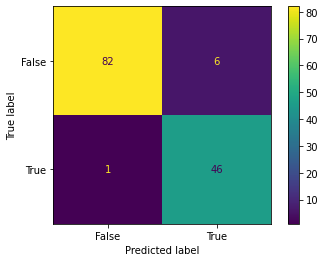

In [46]:
from sklearn import metrics
cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=con,display_labels=[False,True])
cm_disp.plot()
plt.show()